In [ ]:
!pip install openpyxl
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
# Upload do arquivo
uploaded = files.upload()

Saving Dados - NASA Exoplanet Archive.xlsm to Dados - NASA Exoplanet Archive (2).xlsm


In [ ]:
# Verificar se o arquivo foi carregado corretamente
file_path = next(iter(uploaded))  # Obter o nome do arquivo carregado

In [ ]:
# Ler o arquivo .xlsm considerando a primeira linha como cabeçalho
df = pd.read_excel(file_path, sheet_name=None)

In [ ]:
# Verificar as planilhas disponíveis
print("Planilhas disponíveis:")
print(df.keys())

Planilhas disponíveis:
dict_keys(['q1_q17_dr25_koi_2024.09.08_05.4'])


In [ ]:
# Carregar os dados dessa planilha
df = df[list(df.keys())[0]]

In [ ]:
# Mostrar as primeiras linhas da tabela para verificar o carregamento
print("Primeiras linhas da tabela:")
print(df.head())

Primeiras linhas da tabela:
      kepid kepoi_name    kepler_name koi_disposition koi_pdisposition  \
0  11446443  K00001.01     Kepler-1 b       CONFIRMED        CANDIDATE   
1  10666592  K00002.01     Kepler-2 b       CONFIRMED        CANDIDATE   
2  10748390  K00003.01     Kepler-3 b       CONFIRMED        CANDIDATE   
3   3861595  K00004.01  Kepler-1658 b       CONFIRMED        CANDIDATE   
4   8554498  K00005.01            NaN       CANDIDATE        CANDIDATE   

   koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  ...  \
0      0.811              0              0              0              0  ...   
1  10000.000              0              1              0              0  ...   
2      0.913              0              0              0              0  ...   
3  10000.000              0              1              0              0  ...   
4  10000.000              0              0              0              0  ...   

   koi_steff_err2  koi_slogg  koi_slogg_

In [ ]:
# Verificar se os nomes das colunas estão corretos
print("Nomes das colunas:")
print(df.columns)

Nomes das colunas:
Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')


In [ ]:
# Confirmar que as colunas necessárias existem
required_columns = ['koi_teq', 'koi_insol']
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"As colunas necessárias {required_columns} não foram encontradas.")


In [ ]:
# Verificar tipos de dados das colunas
print("Tipos de dados das colunas:")
print(df.dtypes)

Tipos de dados das colunas:
kepid                  int64
kepoi_name            object
kepler_name           object
koi_disposition       object
koi_pdisposition      object
koi_score            float64
koi_fpflag_nt          int64
koi_fpflag_ss          int64
koi_fpflag_co          int64
koi_fpflag_ec          int64
koi_period           float64
koi_period_err1      float64
koi_period_err2      float64
koi_time0bk            int64
koi_time0bk_err1     float64
koi_time0bk_err2     float64
koi_impact           float64
koi_impact_err1      float64
koi_impact_err2      float64
koi_duration         float64
koi_duration_err1    float64
koi_duration_err2    float64
koi_depth            float64
koi_depth_err1       float64
koi_depth_err2       float64
koi_prad             float64
koi_prad_err1        float64
koi_prad_err2        float64
koi_teq              float64
koi_teq_err1         float64
koi_teq_err2         float64
koi_insol            float64
koi_insol_err1       float64
koi_insol_err2 

In [ ]:

# Converter colunas para numérico, forçando erros para NaN
df[required_columns] = df[required_columns].apply(pd.to_numeric, errors='coerce')

In [ ]:
# Verificar se há valores ausentes após conversão
print("Valores ausentes por coluna após conversão:")
print(df.isnull().sum())

Valores ausentes por coluna após conversão:
kepid                   0
kepoi_name              0
kepler_name          5326
koi_disposition         0
koi_pdisposition        0
koi_score               0
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       150
koi_period_err2       150
koi_time0bk             0
koi_time0bk_err1      150
koi_time0bk_err2      150
koi_impact             59
koi_impact_err1       150
koi_impact_err2       150
koi_duration            0
koi_duration_err1     150
koi_duration_err2     150
koi_depth              59
koi_depth_err1        150
koi_depth_err2        150
koi_prad               59
koi_prad_err1          59
koi_prad_err2          59
koi_teq                59
koi_teq_err1         8054
koi_teq_err2         8054
koi_insol              59
koi_insol_err1         59
koi_insol_err2         59
koi_model_snr          59
koi_tce_plnt_num        0
koi_tce_delivname   

In [ ]:
# Remover valores ausentes
df.dropna(subset=required_columns, inplace=True)

In [ ]:
# Verificar se ainda há dados para normalizar
if df.empty:
    raise ValueError("O DataFrame está vazio após a remoção de valores ausentes. Verifique seus dados.")


In [ ]:
# Normalizar dados
scaler = StandardScaler()
df[required_columns] = scaler.fit_transform(df[required_columns])

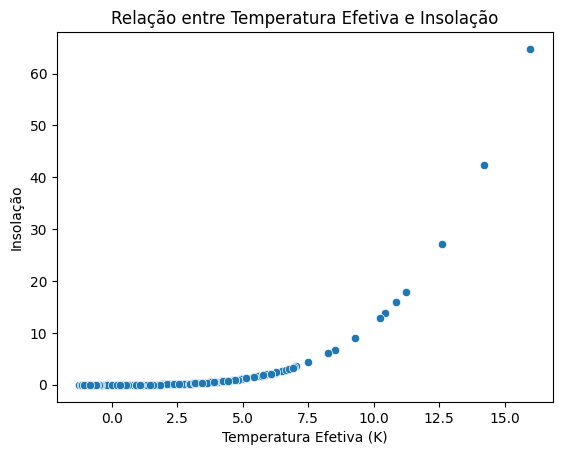

In [ ]:
# Gráfico de dispersão
sns.scatterplot(x='koi_teq', y='koi_insol', data=df)
plt.xlabel('Temperatura Efetiva (K)')
plt.ylabel('Insolação')
plt.title('Relação entre Temperatura Efetiva e Insolação')
plt.show()

In [ ]:
# Cálculo do coeficiente de correlação
correlation = df[['koi_teq', 'koi_insol']].corr().iloc[0, 1]
print(f'Coeficiente de Correlação: {correlation}')

Coeficiente de Correlação: 0.43102513233655226


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Dividir dados em treino e teste
X = df[['koi_teq']]
y = df['koi_insol']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Implementar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Fazer previsões
y_pred = model.predict(X_test)

In [ ]:
# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Erro Quadrático Médio (MSE): {mse}')
print(f'Coeficiente de Determinação (R²): {r2}')

Erro Quadrático Médio (MSE): 0.9271660009881271
Coeficiente de Determinação (R²): 0.1866827897241976


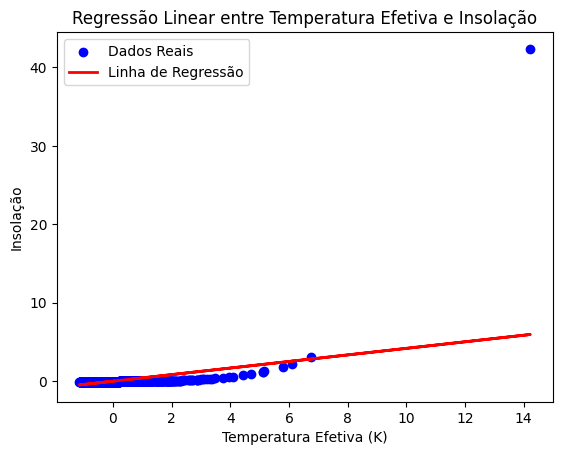

In [ ]:
# Plotar linha de regressão
plt.scatter(X_test, y_test, color='blue', label='Dados Reais')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linha de Regressão')
plt.xlabel('Temperatura Efetiva (K)')
plt.ylabel('Insolação')
plt.title('Regressão Linear entre Temperatura Efetiva e Insolação')
plt.legend()
plt.show()